In [1]:
import numpy as np
import pandas as pd

PART 1 [25 pts]:


(a) [5 pts] How does the number of convolutional layers influence the learning power of deep
neural networks?
Ans:

As we increase the number of convolutional layers, model starts learning more low level features of the data, which can help increase model's overall performance.

(b)[10 pts] Naïve implementation of very deep convolutional neural networks may not learn from
the data. What would be the main reason(s) of the aforementioned issue? How can you handle
such problems?
Ans:

increasing too much number of layers can lead to overfitting and also delay training time, as number of learning parameters increase exponentially. Overfitting will result in model's inability to generalize over test data. One solution to this problem is to use pooling layers between consecutive convolutional layer. Pooling layer will only extract the most important feature within a subspace of feature causing model to less overfit.

(c) [10 pts] Do we observe issues similar to the ones indicated in part 1(b) for basic (vanilla) version
of recurrent neural networks? Please explain/discuss, provide an example, and indicate possible
solutions
Ans:

In recurrent neural networks, as we increase the number of recurrent layers, RNNs experience a very well known problem of 'Gradient vanishing' that is, if we increase layers too much, while backpropogation, due to large recurrent networks, the gradient will vanish after a certain point leading the model to learning nothing. So instead of simple RNNs, we use gated RNNs like LSTM which doesnt face these vanishing gradient problem.

# part 2

In [2]:
# Matplotlib for visualizing graphs
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
def plot_graph(dataset, pred_line=None, losses=None):
    
    plots = 2 if losses!=None else 1
    
    fig = plt.figure(figsize=(8 * plots, 6))
    
    
    X, y = dataset['X'], dataset['y']
    
    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(X, y, alpha=0.8)                                # Plot the original set of datapoints
    
    if(pred_line != None):

        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        ax1.set_title('Predicted Line on set of Datapoints')
    
    else:
        ax1.set_title('Plot of Datapoints generated')
   
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')

    plt.show()
def plot_pred_line(X, y, m, b,losses=None):
    
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(X), np.max(X), 10)             
    
    # Calculate the corresponding y with the parameter values of m & b
    y_line = m * x_line + b                                                
    
    plot_graph(dataset={'X': X, 'y': y}, pred_line={'x_line': x_line, 'y_line':y_line}, losses=losses)
    
    return

In [3]:
def param_init():
    weight_1 = np.random.normal(scale=10)
    bias_1 = np.random.normal(scale=10)
    return weight_1, bias_1
def normalize(arr):
    return (arr - np.mean(arr)) / np.std(arr)
def shuffle(x):
    index = np.arange(x.shape[0])
    np.random.shuffle(index)
    return x[index, :]
def loss_func(weight_1, bias_1, train):
    output = train[:,0] * weight_1 + bias_1
    return (1/2) * np.mean(np.square(output - train[:,1]))
file = open("train1", "r")
train = []
for x in file:
    temp = x.split('\t')
    #print(x)
    #print(temp[1].split('\n'))
    train.append([float(temp[0]), float(temp[1].split('\n')[0])])
train = np.array(train)    
file = open("test1", "r")
test = []
for x in file:
    temp = x.split('\t')
    #print(temp)
    test.append([float(temp[0]), float(temp[1].split('\n')[0])])
test = np.array(test)
LEARNING_RATE = 0.001
EPOCHS = 200
weight_1, bias_1 = param_init()
training_mse, testing_mse = [], []
losses = []
train = normalize(train)
test = normalize(test)
for epoch in range(EPOCHS):
    train = shuffle(train)
    for stoch_train in train:
        #FORWARD PROPOGATION
        output = stoch_train[0] * weight_1 + bias_1
        #BACKWARD PROPOGATION
        d_weight_1 = (output - stoch_train[1]) * stoch_train[0]
        d_bias_1 = output - stoch_train[1]
        #UPDATE PARAMETERS
        weight_1 = weight_1 - LEARNING_RATE * d_weight_1
        bias_1 = bias_1 - LEARNING_RATE * d_bias_1
    training_mse.append(loss_func(weight_1, bias_1, train))
    testing_mse.append(loss_func(weight_1, bias_1, test))
    if epoch%10==0:
        print('EPOCH: ', epoch, 'TRAIN LOSS: ', training_mse[epoch], 'TEST LOSS ',testing_mse[epoch])


EPOCH:  0 TRAIN LOSS:  35.50465333467513 TEST LOSS  52.36455977991784
EPOCH:  10 TRAIN LOSS:  9.181546470084074 TEST LOSS  20.085717229969916
EPOCH:  20 TRAIN LOSS:  2.7453532473944633 TEST LOSS  9.840681841973902
EPOCH:  30 TRAIN LOSS:  1.167735557542508 TEST LOSS  6.162879275174318
EPOCH:  40 TRAIN LOSS:  0.778705198770809 TEST LOSS  4.675656742451603
EPOCH:  50 TRAIN LOSS:  0.6802734520389038 TEST LOSS  4.0117566895334384
EPOCH:  60 TRAIN LOSS:  0.6530046681678002 TEST LOSS  3.69333776392521
EPOCH:  70 TRAIN LOSS:  0.6429471281253767 TEST LOSS  3.526726544877211
EPOCH:  80 TRAIN LOSS:  0.6372326168811114 TEST LOSS  3.4344147441511526
EPOCH:  90 TRAIN LOSS:  0.6326028359037795 TEST LOSS  3.376445070179239
EPOCH:  100 TRAIN LOSS:  0.6282983093632917 TEST LOSS  3.333937478605482
EPOCH:  110 TRAIN LOSS:  0.6241435349753115 TEST LOSS  3.2997584512707303
EPOCH:  120 TRAIN LOSS:  0.6200877225417597 TEST LOSS  3.2690988058624257
EPOCH:  130 TRAIN LOSS:  0.6161175369639413 TEST LOSS  3.23958

# b)
ANN used (specify the number of hidden units): Not Applicable as Linear regressor is used


Learning rate:0.001


Range of initial weights: -1 to 1


Number of epochs: 200


When to stop: When test loss increases


Is normalization used: Yes


Training loss (averaged over training instances): 0.42


Test loss (averaged over test instances): 1.29

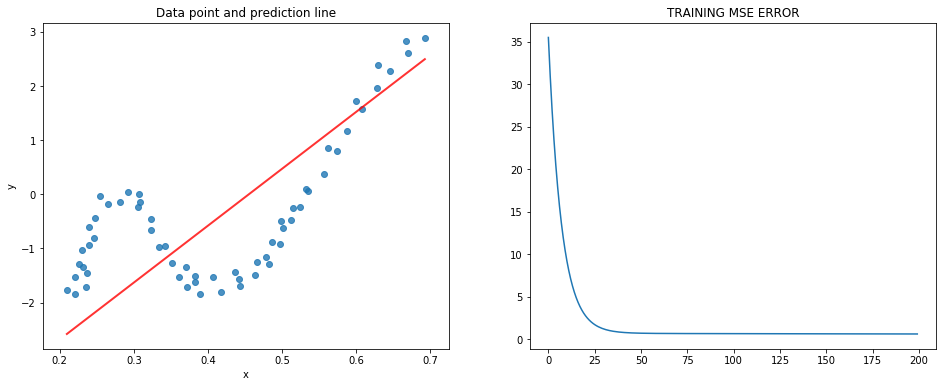

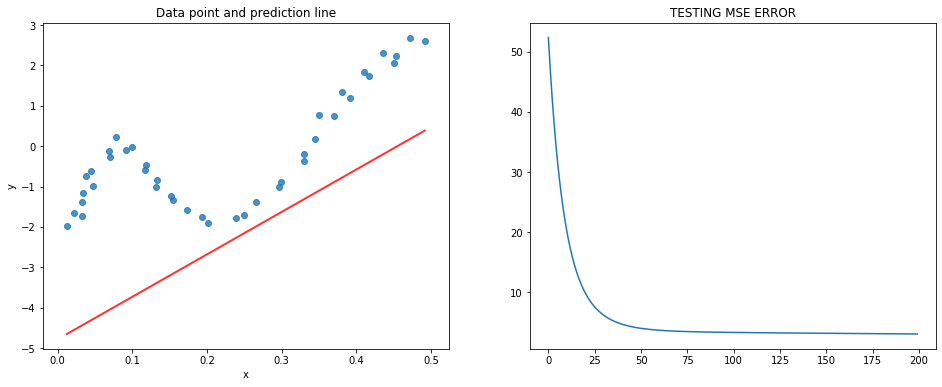

In [4]:
def plot(data, weight, bias, error, training):
    x_line = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 10)
    y_pred = weight * x_line + bias
    fig = plt.figure(figsize=(8 * 2, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(data[:,0], data[:,1], alpha=0.8)
    ax1.plot(x_line, y_pred, linewidth=2, markersize=12, color='red', alpha=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Data point and prediction line')
    
    ax2.plot(error)
    if training:
        ax2.set_title('TRAINING MSE ERROR')
    else:    
        ax2.set_title('TESTING MSE ERROR')
    
        
    plt.show()
plot(train, weight_1, bias_1, training_mse, True)
plot(test, weight_1, bias_1, testing_mse, False)

# c)

In [34]:
def param_init(input_layer_size, hidden_layer_size, output_layer_size):
    weight_1 = np.random.randn(hidden_layer_size, input_layer_size) * 0.05
    bias_1 = np.zeros((hidden_layer_size, 1))
    
    weight_2 = np.random.randn(output_layer_size, hidden_layer_size) * 0.05
    bias_2 = np.zeros((output_layer_size, 1))
    
    return weight_1, bias_1, weight_2, bias_2
def normalize(arr):
    return (arr - np.mean(arr)) / np.std(arr)
def shuffle(x):
    index = np.arange(x.shape[0])
    np.random.shuffle(index)
    return x[index, :]
def loss_func(weight_1, bias_1, weight_2, bias_2, train):
    
    weighted_sum1 = np.dot(np.reshape(train[:, 0], (train.shape[0],1)),weight_1.T) + bias_1.T
    activation1 = 1/(1 + np.exp(-weighted_sum1))
    
    weighted_sum2 = np.dot(activation1, weight_2.T) + bias_2.T
    output = weighted_sum2
    
    return (1/2) * np.mean(np.square(output - train[:,1]))
def plot_2(data, weight_1, bias_1,weight_2, bias_2, error, training, hiddenunits):
    x_line = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 40)
    x_line = np.reshape(x_line, (x_line.shape[0],1))
    
    weighted_sum1 = np.dot(x_line, weight_1.T) + bias_1.T
    activation1 = 1/(1 + np.exp(-weighted_sum1))
    #print(activation1.shape)
    weighted_sum2 = np.dot(activation1, weight_2.T) + bias_2.T
    y_pred = weighted_sum2
    
    
    #y_pred = weight * x_line + bias
    fig = plt.figure(figsize=(8 * 2, 6))
    
    plt.plot(error)
    if training:
        plt.title('TRAINING MSE ERROR. Hidden Units: ' + str(hiddenunits))
    else:    
        plt.title('TESTING MSE ERROR. Hidden Units: ' + str(hiddenunits))
    
        
    plt.show()
def plot_2_pred(data, weight_1, bias_1,weight_2, bias_2, error, training):
    x_line = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 40)
    x_line = np.reshape(x_line, (x_line.shape[0],1))
    
    weighted_sum1 = np.dot(x_line, weight_1.T) + bias_1.T
    activation1 = 1/(1 + np.exp(-weighted_sum1))
    #print(activation1.shape)
    weighted_sum2 = np.dot(activation1, weight_2.T) + bias_2.T
    y_pred = weighted_sum2
    
    
    #y_pred = weight * x_line + bias
    fig = plt.figure(figsize=(8 * 2, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(data[:,0], data[:,1], alpha=0.8)
    ax1.plot(x_line, y_pred, linewidth=2, markersize=12, color='red', alpha=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Data point and prediction line')
    
    
def hiddenlayer_ann_regressor(epochs, lr, hiddenunits, optimalparams):
    file = open("train1", "r")
    train = []
    for x in file:
        temp = x.split('\t')
        #print(x)
        #print(temp[1].split('\n'))
        train.append([float(temp[0]), float(temp[1].split('\n')[0])])
    train = np.array(train)    
    file = open("test1", "r")
    test = []
    for x in file:
        temp = x.split('\t')
        #print(temp)
        test.append([float(temp[0]), float(temp[1].split('\n')[0])])
    test = np.array(test)   
    HIDDEN_LAYER_SIZE = hiddenunits
    LEARNING_RATE = lr
    EPOCHS = epochs
    weight_1, bias_1, weight_2, bias_2 = param_init(1, HIDDEN_LAYER_SIZE, 1)
    training_mse, testing_mse = [], []

    train = normalize(train)
    test = normalize(test)
    for epoch in range(EPOCHS):
        train = shuffle(train)
        for stoch_train in train:
            weighted_sum1 = np.dot(stoch_train[0], weight_1.T) + bias_1.T
            activation1 = 1/(1 + np.exp(-weighted_sum1))
            #print(activation1.shape)
            weighted_sum2 = np.dot(activation1, weight_2.T) + bias_2.T
            output = weighted_sum2
            #print(output)
            d_weighted_sum2 = output - stoch_train[1]
            d_weight2 = np.dot(d_weighted_sum2, activation1)
            d_bias2 = d_weighted_sum2

            d_weighted_sum1 = np.multiply(np.dot(d_weighted_sum2,weight_2), activation1*(1 - activation1))
            d_weight1 = np.dot(d_weighted_sum1.T, stoch_train[0])
            d_bias1 = d_weighted_sum1.T
            #print(d_weight2.shape)
            weight_2 = weight_2 - LEARNING_RATE * d_weight2
            bias_2 = bias_2 - LEARNING_RATE * d_bias2
            weight_1 = weight_1 - LEARNING_RATE * d_weight1
            bias_1 = bias_1 - LEARNING_RATE * d_bias1
            #print(weight_2.shape)
        training_mse.append(loss_func(weight_1, bias_1, weight_2, bias_2, train))
        testing_mse.append(loss_func(weight_1, bias_1, weight_2, bias_2, test))
    
    

    plot_2(train, weight_1, bias_1,weight_2,bias_2, training_mse, True, hiddenunits)
    plot_2(test, weight_1, bias_1,weight_2,bias_2, testing_mse, False, hiddenunits)        
    optimalparams[str(hiddenunits)] = [weight_1, weight_2, bias_1, bias_2, training_mse, testing_mse, LEARNING_RATE, EPOCHS, train.shape[0], test.shape[0]]
    return optimalparams
optimalparams = {}        
    
        
        

# graphs for part c
# Each Hidden Unit has seperate Training loss and Testing loss

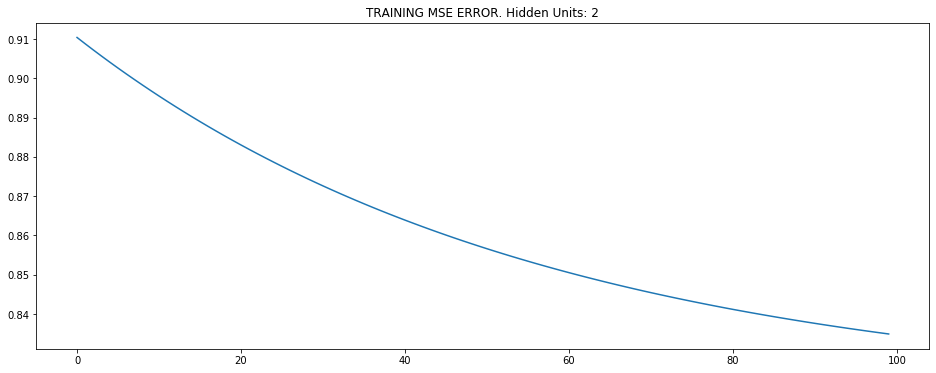

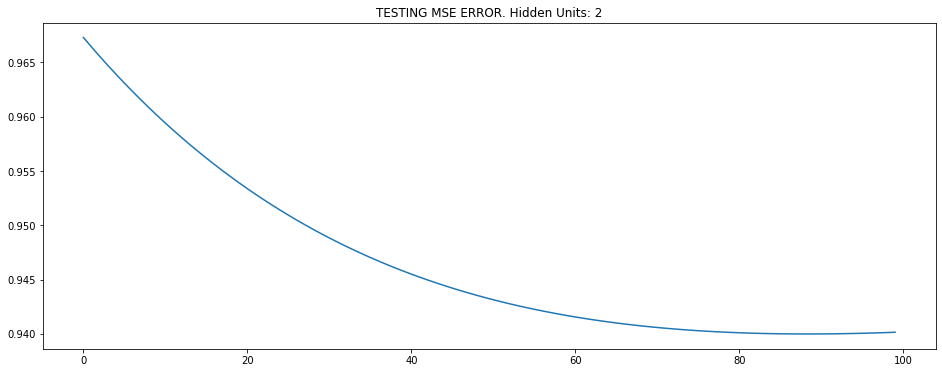

In [35]:
optimalparams = hiddenlayer_ann_regressor(100, 0.0001, 2, optimalparams)    

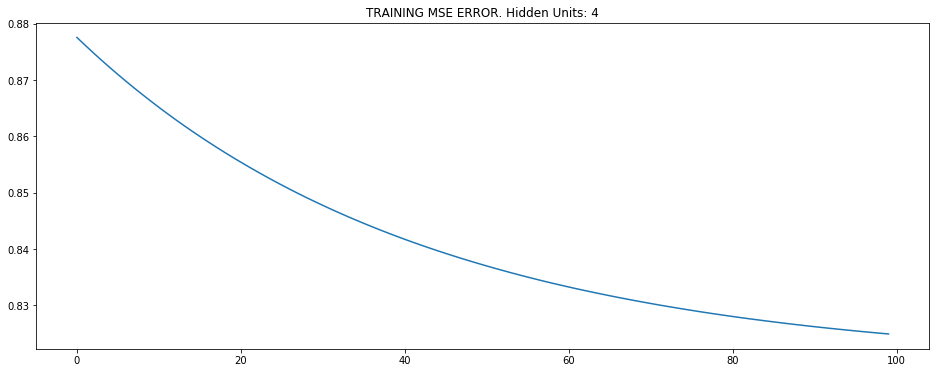

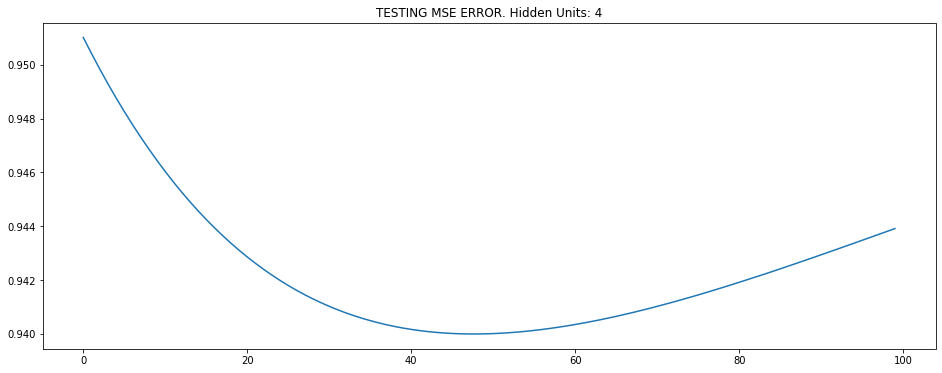

In [36]:
optimalparams = hiddenlayer_ann_regressor(100, 0.0001, 4, optimalparams) 

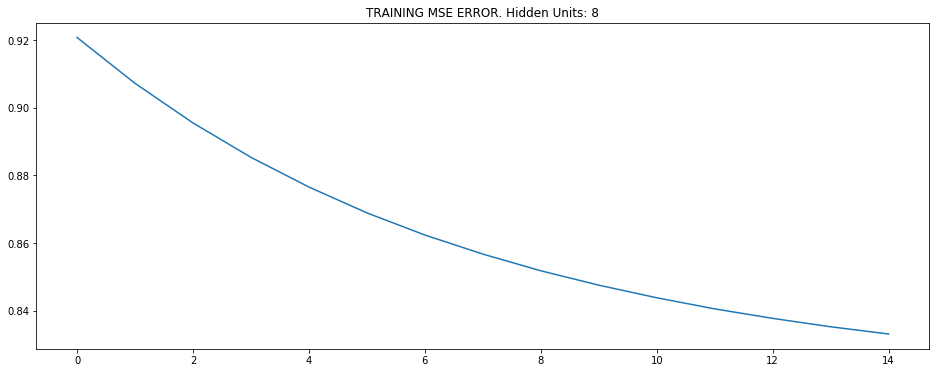

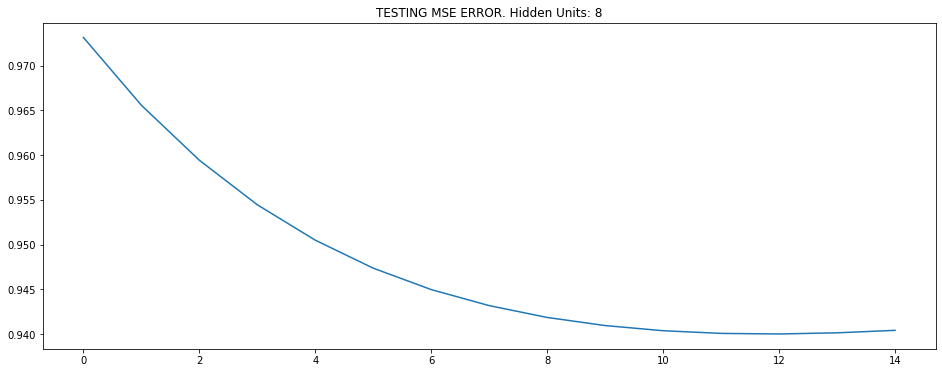

In [37]:
optimalparams = hiddenlayer_ann_regressor(15, 0.0004, 8, optimalparams) 

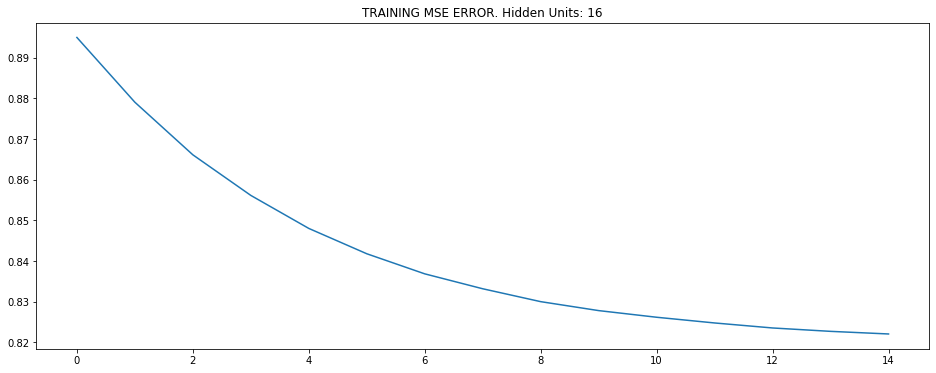

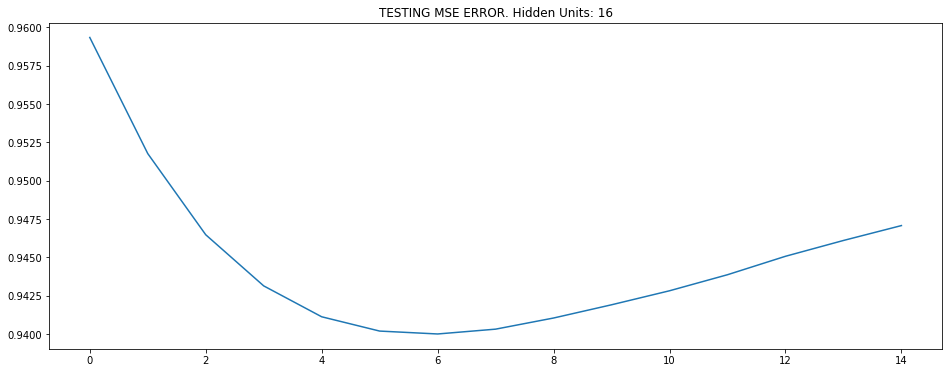

In [38]:
optimalparams = hiddenlayer_ann_regressor(15, 0.0004, 16, optimalparams) 

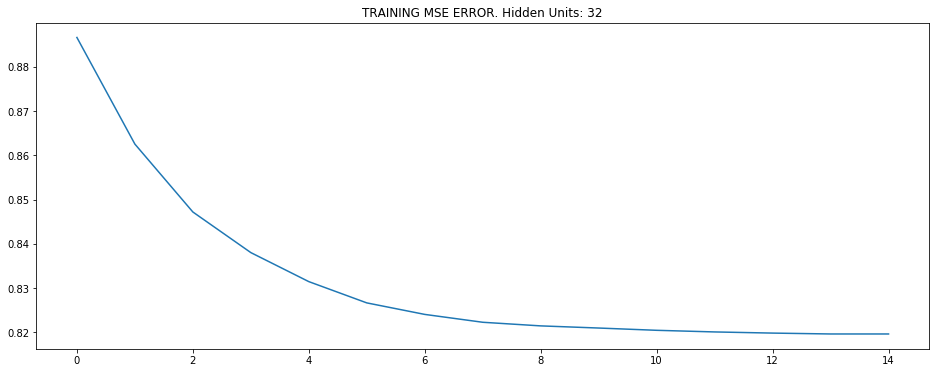

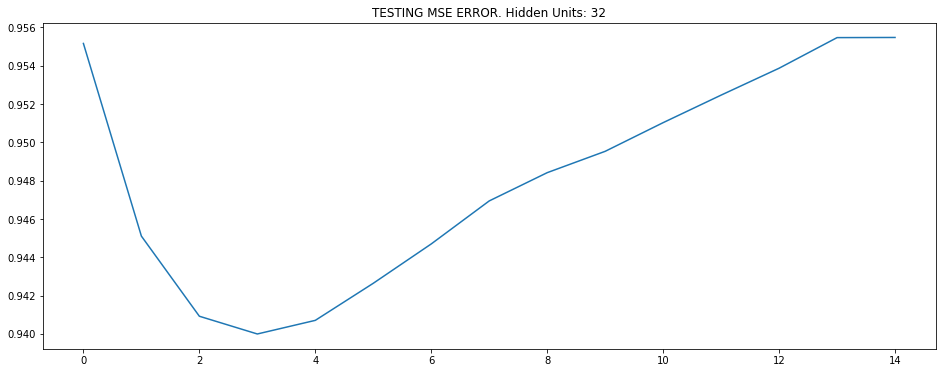

In [39]:
optimalparams = hiddenlayer_ann_regressor(15, 0.0004, 32, optimalparams) 

In [ ]:
training_error = []
testing_error = []
trainingerror_std = []
testingerror_std = [] 
for hidden_layer in optimalparams.keys():
    training_error.append(np.sum(optimalparams[hidden_layer][4])/optimalparams[hidden_layer][8])
    testing_error.append(np.sum(optimalparams[hidden_layer][5])/optimalparams[hidden_layer][9])
    trainingerror_std.append(np.std(optimalparams[hidden_layer][4]))
    testingerror_std.append(np.std(optimalparams[hidden_layer][5]))
df = pd.DataFrame({'hidden_layers':[2, 4, 8, 16, 32], 'Average Training Error':training_error,
                  'Training Error Standard Deviation':trainingerror_std, 'Average Testing Error':testing_error,
                  'Testing Error Standard Deviation':testingerror_std})
#df = df.set_index(df.hidden_layers)

# Table for c part

In [33]:
df

,hidden_layers,Average Training Error,Training Error Standard Deviation,Average Testing Error,Testing Error Standard Deviation
0,2,1.413489,0.014484,2.298869,0.003292
1,4,1.414940,0.019549,2.301882,0.005029
2,8,0.218916,0.033724,0.348626,0.014960
3,16,0.207469,0.009660,0.345427,0.003526
4,32,0.208485,0.021468,0.346927,0.005807


# c part last 

As we increase the number of hidden units, we can see that the average training and average testing loss decreases by large amount. Also, likewise, the standard deviation of training error also decreases, meaning model was more stable while learning as we increased the number of hidden layer. This is mainly because, as we increase the number of hidden units, we introduce more non-linearity in the learning process. Increasing the hidden units is also not a good idea, as it can lead to overfitting the training data. For example, model with 16 hidden layers' average testing error is better than model with 32 hidden layers' average testing error, but training error is lesser for higher hidden unit. This is because the model starts overfitting when number of hidden unit surpasses 16 units, it looks like.